# Web3 Trading Team – Data Science Assignment


# Title & Objective

# Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# Paths

In [39]:
df_trades = r'C:\Users\Visla\Downloads\ds_vislavath_hathiram\csv_files\hyperliquid_trades.csv'
df_sentiment = r'C:\Users\Visla\Downloads\ds_vislavath_hathiram\csv_files\bitcoin_sentiment.csv'

# Load datasets

In [40]:
historical  = pd.read_csv("C:\\Users\\Visla\\Downloads\\ds_Vislavath_Hathiram\\csv_files\\historical_data.csv")
fg = pd.read_csv("C:\\Users\\Visla\\Downloads\\ds_Vislavath_Hathiram\\csv_files\\fear_greed_index.csv")


# Quick check

In [41]:
print("=== Trader Data ===")
print("\nFear & Greed Columns:", list(fg.columns))

=== Trader Data ===

Fear & Greed Columns: ['timestamp', 'value', 'classification', 'date']


In [42]:
print("=== Market Sentiment Data ===")
print("\nHistorical Data Columns:", list(historical.columns))

=== Market Sentiment Data ===

Historical Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [43]:
historical 

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [44]:
fg

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


# data cleaning & exploration (EDA)

In [45]:
print("Trader data info:")
print(historical.info())


Trader data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [46]:
print("\nSentiment data info:")
print(fg.info())


Sentiment data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


# Check missing values

In [47]:
print("\nMissing Values:")
print(fg.isnull().sum())


Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [48]:
print("\nMissing Values:")
print(historical.isnull().sum())


Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


print(sentiment_df.describe())## Summary statistics

In [49]:
print(historical.describe()) ## Summary statistics

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

In [50]:
print(fg.describe()) ## Summary statistics

          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000


# Handle missing values and Prepare & clean the data

In [51]:
# Rename for easier handling

historical.rename(columns=lambda x: x.strip(), inplace=True)

In [52]:
# Convert timestamp to datetime
historical['Timestamp'] = pd.to_datetime(historical['Timestamp IST'], errors='coerce')
historical['Date'] = historical['Timestamp'].dt.date


In [53]:
# Convert numeric columns
historical['Closed PnL'] = pd.to_numeric(historical['Closed PnL'], errors='coerce')
historical['Size USD'] = pd.to_numeric(historical['Size USD'], errors='coerce')

In [54]:
# Prepare Fear & Greed dataset
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date
fg['classification'] = fg['classification'].str.lower()
fg['sentiment'] = fg['classification'].apply(lambda x: 'greed' if 'greed' in x else 'fear')

In [55]:


print(" Data cleaned and ready!")
display("historical",historical.head())
display("fg",fg.head())


 Data cleaned and ready!


'historical'

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-02-12 22:50:00,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-02-12 22:50:00,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-02-12 22:50:00,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-02-12 22:50:00,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-02-12 22:50:00,2024-02-12


'fg'

,timestamp,value,classification,date,sentiment
0,1517463000,30,fear,2018-02-01,fear
1,1517549400,15,extreme fear,2018-02-02,fear
2,1517635800,40,fear,2018-02-03,fear
3,1517722200,24,extreme fear,2018-02-04,fear
4,1517808600,11,extreme fear,2018-02-05,fear


# Merge both datasets (by date)

In [56]:
merged = pd.merge(historical, fg[['date', 'sentiment']], left_on='Date', right_on='date', how='left')
print("Datasets merged successfully!")
display(merged.head())

Datasets merged successfully!


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-02-12 22:50:00,2024-02-12,2024-02-12,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-02-12 22:50:00,2024-02-12,2024-02-12,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-02-12 22:50:00,2024-02-12,2024-02-12,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-02-12 22:50:00,2024-02-12,2024-02-12,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-02-12 22:50:00,2024-02-12,2024-02-12,greed


# Calculate daily summary statistics

In [57]:
# Step 5: Daily stats

daily = merged.groupby(['Date', 'sentiment']).agg({
    'Closed PnL': ['mean', 'sum'],
    'Size USD': 'sum',
    'Account': 'count'
}).reset_index()


In [58]:
daily.columns = ['Date', 'Sentiment', 'Avg_PnL', 'Total_PnL', 'Total_Volume_USD', 'Trade_Count']
print(" Daily statistics created!")
display(daily.head())

 Daily statistics created!


,Date,Sentiment,Avg_PnL,Total_PnL,Total_Volume_USD,Trade_Count
0,2023-01-05,fear,0.000000,0.000000,477.00,3
1,2023-05-12,fear,0.000000,0.000000,50005.83,9
2,2024-01-01,greed,-7.196192,-129.531460,264239.53,18
3,2024-01-02,greed,0.000000,0.000000,2008.18,6
4,2024-01-03,greed,60.176945,8244.241409,472974.70,137


# descriptive statistics

In [59]:
# Step 6: Descriptive stats by Sentiment
# Step 6: Descriptive stats by Sentiment (fixed)
stats_summary = daily.groupby('Sentiment')[['Avg_PnL', 'Total_PnL', 'Total_Volume_USD']].describe()

print("Basic statistics by sentiment:")
display(stats_summary)



Basic statistics by sentiment:


Avg_PnL                                                     \
            count       mean         std         min  25%        50%   
Sentiment                                                              
fear         59.0  43.894655   79.861967  -73.243220  0.0   6.882852   
greed        99.0  36.830276  161.731060 -965.921267  0.0  14.770946   

                                Total_PnL                ...               \
                 75%        max     count          mean  ...          75%   
Sentiment                                                ...                
fear       61.438405  415.93322      59.0  31496.309512  ...  5712.516715   
greed      65.759446  918.15616      99.0  17843.699073  ...  3954.405653   

                         Total_Volume_USD                                    \
                     max            count          mean           std   min   
Sentiment                                                                     
fear       616413.032233             59.0  1.715156e+06  4.021901e+06  0.11   
greed      599151.795008             99.0  7.602987e+05  1.760278e+06  0.34   

                                                          
                 25%        50%         75%          max  
Sentiment                                                 
fear       53534.835  270700.44  958444.700  22592901.37  
greed      65736.310  227247.70  473626.565  10720240.52  

[2 rows x 24 columns]

# Probability and Hypothesis Testing

In [60]:
# Separate greed vs fear

greed = daily[daily['Sentiment'] == 'greed']['Avg_PnL'].dropna()
fear = daily[daily['Sentiment'] == 'fear']['Avg_PnL'].dropna()

In [61]:
# Mean comparison
print("Average Daily PnL (Greed):", greed.mean())
print("Average Daily PnL (Fear):", fear.mean())


Average Daily PnL (Greed): 36.83027579542648
Average Daily PnL (Fear): 43.89465518340126


In [62]:
# T-Test

t_stat, p_val = stats.ttest_ind(greed, fear, equal_var=False)
print("\nT-Test Results:")
print(f"T-statistic = {t_stat:.4f}, P-value = {p_val:.6f}")


T-Test Results:
T-statistic = -0.3661, P-value = 0.714788


In [63]:
# Win probability
merged['Win'] = np.where(merged['Closed PnL'] > 0, 1, 0)
win_rate = merged.groupby('sentiment')['Win'].mean()
print("\nWin Probability by Sentiment:")
print(win_rate)


Win Probability by Sentiment:
sentiment
fear     0.387315
greed    0.474783
Name: Win, dtype: float64


# --- Visualization ---

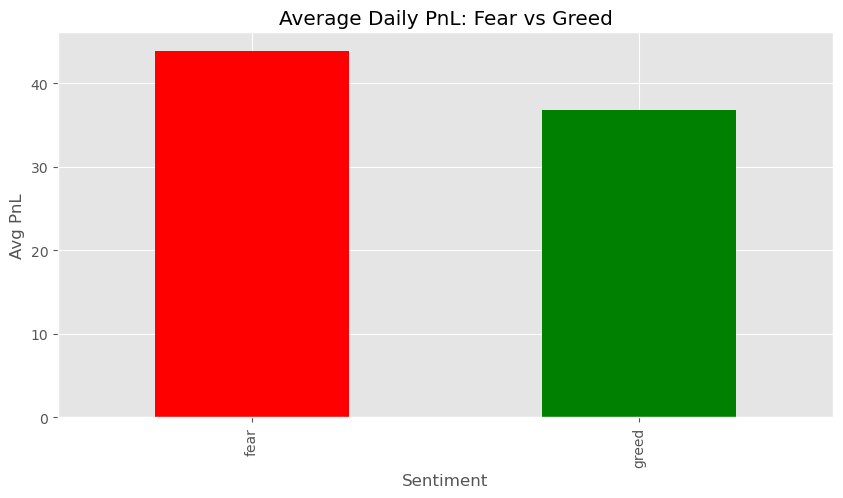

In [64]:
# Plot results

plt.figure(figsize=(10,5))
daily.groupby('Sentiment')['Avg_PnL'].mean().plot(kind='bar', color=['red','green'])
plt.title("Average Daily PnL: Fear vs Greed")
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.grid(True)
plt.show()

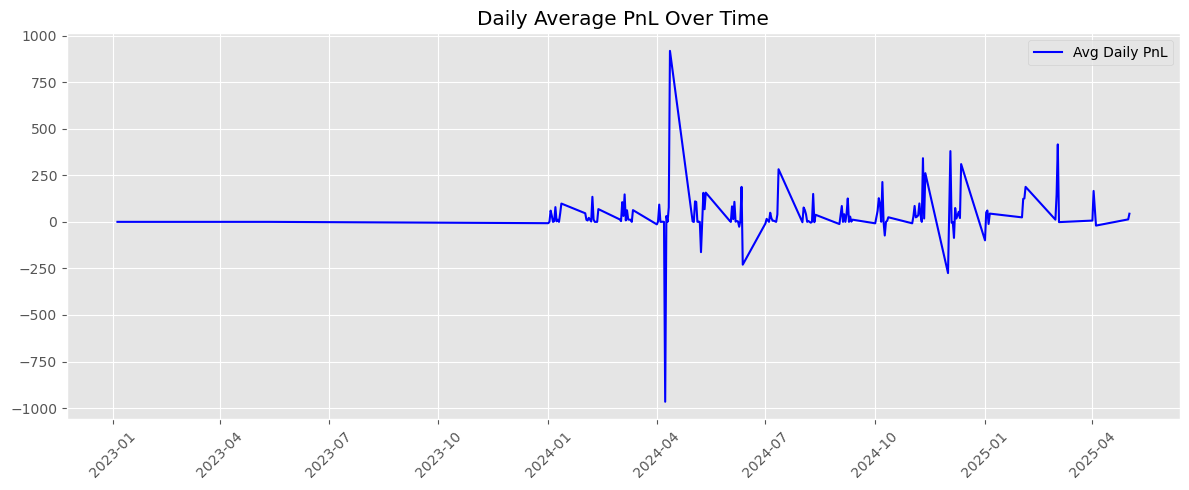

In [65]:
plt.figure(figsize=(12,5))
plt.plot(daily['Date'], daily['Avg_PnL'], label='Avg Daily PnL', color='blue')
plt.xticks(rotation=45)
plt.title("Daily Average PnL Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# 1. Average Profit by Sentiment (Bar Chart)

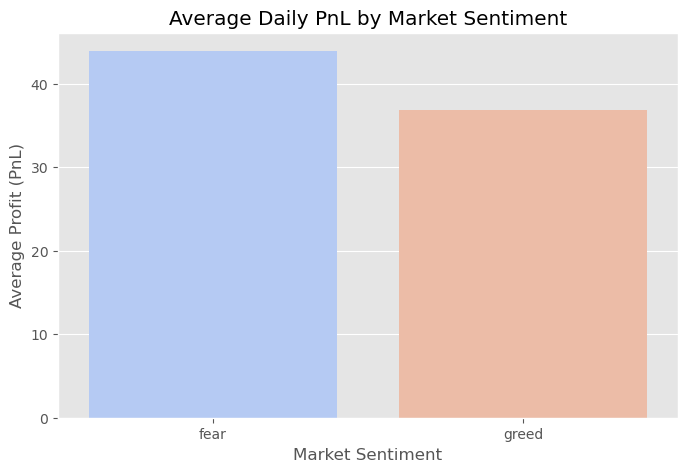

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment', y='Avg_PnL', hue='Sentiment', data=daily, palette='coolwarm', errorbar=None, legend=False)
plt.title("Average Daily PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Profit (PnL)")
plt.show()



# 2. Total Trading Volume by Sentiment (Pie Chart)

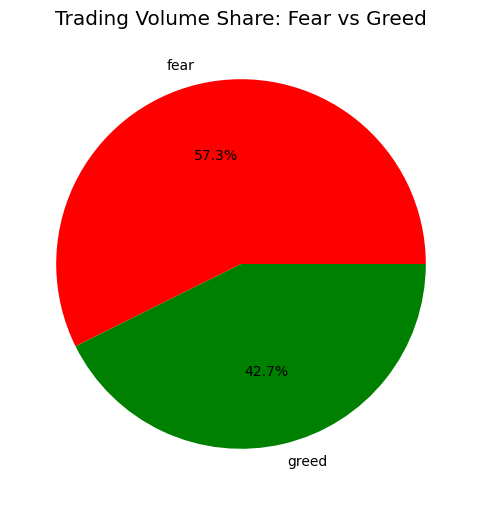

In [67]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
daily.groupby('Sentiment')['Total_Volume_USD'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['red','green'])
plt.title("Trading Volume Share: Fear vs Greed")
plt.ylabel("")
plt.show()


# 3. Profit Trend Over Time (Line Chart)

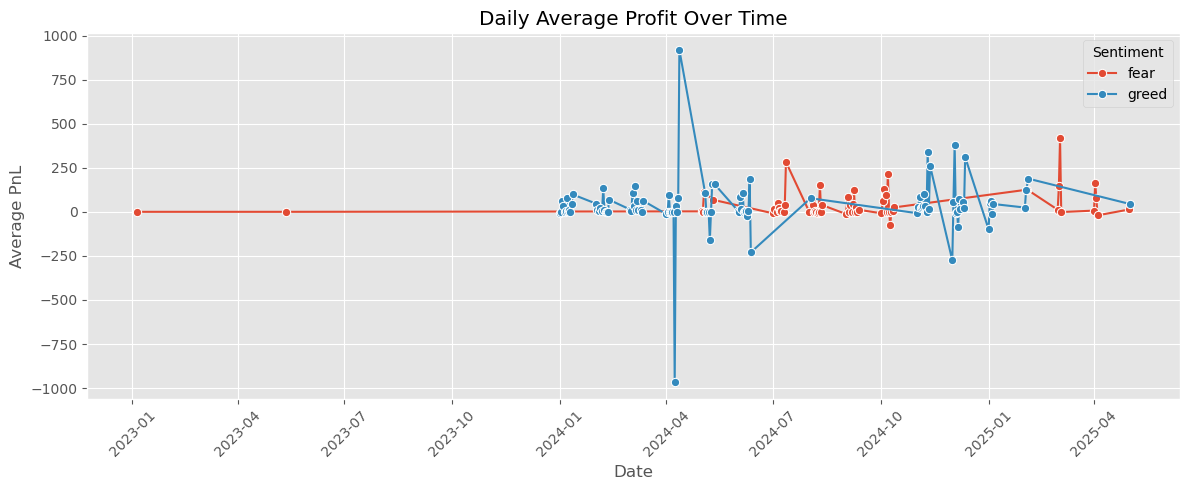

In [68]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Avg_PnL', hue='Sentiment', data=daily, marker='o')
plt.title("Daily Average Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


# 4. Distribution of Profit (Histogram)

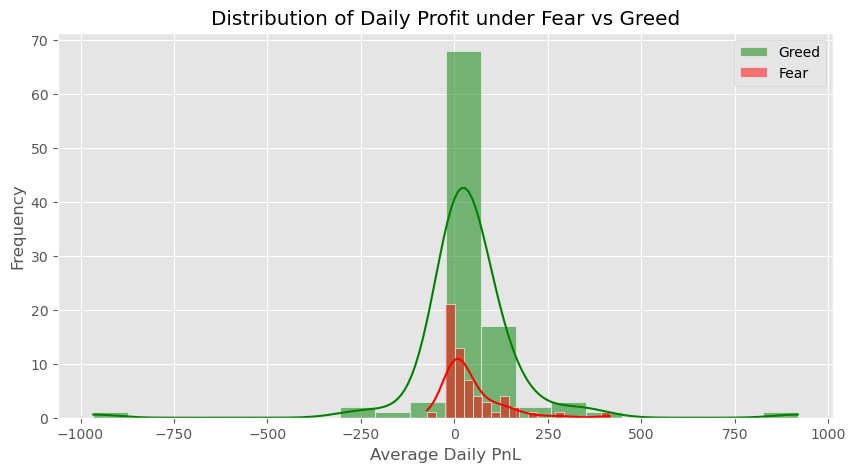

In [69]:
plt.figure(figsize=(10,5))
sns.histplot(greed, bins=20, color='green', label='Greed', kde=True)
sns.histplot(fear, bins=20, color='red', label='Fear', kde=True)
plt.title("Distribution of Daily Profit under Fear vs Greed")
plt.xlabel("Average Daily PnL")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# 5. Win Rate by Sentiment (Bar Chart) 

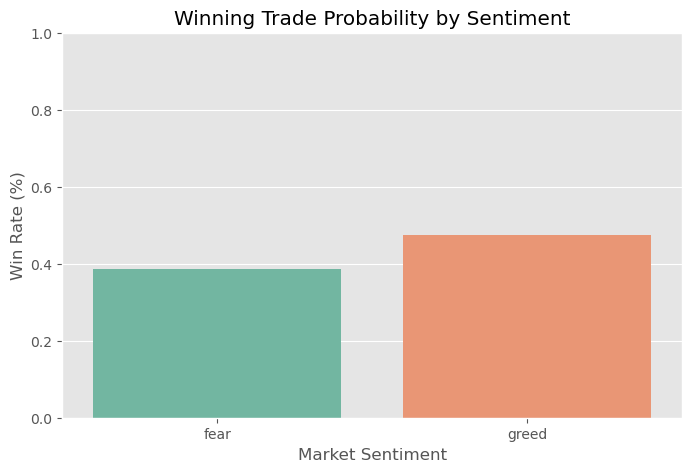

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment', y='Win', hue='sentiment', data=win_rate_df, palette='Set2', legend=False)
plt.title("Winning Trade Probability by Sentiment")
plt.ylabel("Win Rate (%)")
plt.ylim(0,1)
plt.xlabel("Market Sentiment")
plt.show()



 # 6. Correlation Heatmap

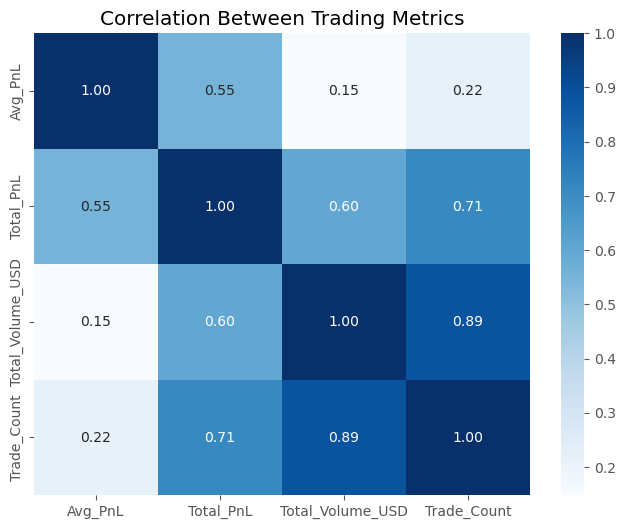

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(daily[['Avg_PnL', 'Total_PnL', 'Total_Volume_USD', 'Trade_Count']].corr(), 
            annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Trading Metrics")
plt.show()


In [72]:
#Save cleaned & merged data
daily.to_csv("daily_summary.csv", index=False)
print(" Results saved to daily_summary.csv")


 Results saved to daily_summary.csv


In [73]:
# Save cleaned & merged data and outputs safely

import os
import seaborn as sns
import matplotlib.pyplot as plt

# ---  folders ---
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# --- 2️ Save cleaned CSVs ---
merged.to_csv("csv_files/merged_trading_sentiment.csv", index=False)
daily.to_csv("csv_files/daily_summary.csv", index=False)

# --- 8 Save plots ---

#  Average Daily PnL: Fear vs Greed
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment', y='Avg_PnL', hue='Sentiment', data=daily, palette='coolwarm', errorbar=None, legend=False)
plt.title("Average Daily PnL: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.savefig("outputs/1_avg_daily_pnl_fear_vs_greed.png", bbox_inches='tight')
plt.close()

#  Daily Average PnL Over Time
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Avg_PnL', hue='Sentiment', data=daily, marker='o')
plt.title("Daily Average PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/2_daily_avg_pnl_over_time.png", bbox_inches='tight')
plt.close()

# Average Profit by Sentiment (Bar Chart)
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment', y='Total_PnL', hue='Sentiment', data=daily, palette='viridis', errorbar=None, legend=False)
plt.title("Average Profit by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total Profit (PnL)")
plt.savefig("outputs/3_avg_profit_by_sentiment_bar.png", bbox_inches='tight')
plt.close()

#  Total Trading Volume by Sentiment (Pie Chart)
plt.figure(figsize=(6,6))
daily.groupby('Sentiment')['Total_Volume_USD'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['red','green'])
plt.title("Total Trading Volume by Sentiment")
plt.ylabel("")
plt.savefig("outputs/4_total_trading_volume_pie.png", bbox_inches='tight')
plt.close()

# Profit Trend Over Time (Line Chart)
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Total_PnL', hue='Sentiment', data=daily, marker='o')
plt.title("Profit Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/5_profit_trend_over_time.png", bbox_inches='tight')
plt.close()

#  Distribution of Profit (Histogram)
plt.figure(figsize=(10,5))
sns.histplot(greed, bins=20, color='green', label='Greed', kde=True)
sns.histplot(fear, bins=20, color='red', label='Fear', kde=True)
plt.title("Distribution of Profit (Fear vs Greed)")
plt.xlabel("Average Daily PnL")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("outputs/6_distribution_of_profit_hist.png", bbox_inches='tight')
plt.close()

#  Win Rate by Sentiment (Bar Chart)
win_rate_df = merged.groupby('sentiment')['Win'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='sentiment', y='Win', hue='sentiment', data=win_rate_df, palette='Set2', legend=False)
plt.title("Win Rate by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.ylim(0,1)
plt.savefig("outputs/7_win_rate_by_sentiment_bar.png", bbox_inches='tight')
plt.close()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(daily[['Avg_PnL', 'Total_PnL', 'Total_Volume_USD', 'Trade_Count']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Trading Metrics")
plt.savefig("outputs/8_correlation_heatmap.png", bbox_inches='tight')
plt.close()

print(" All 8 plots successfully saved in 'outputs/' folder!\n")

# Show all saved file names
for f in os.listdir("outputs"):
    print("-", f)

 All 8 plots successfully saved in 'outputs/' folder!

- .ipynb_checkpoints
- 1_avg_daily_pnl_fear_vs_greed.png
- 2_daily_avg_pnl_over_time.png
- 3_avg_profit_by_sentiment_bar.png
- 4_total_trading_volume_pie.png
- 5_profit_trend_over_time.png
- 6_distribution_of_profit_hist.png
- 7_win_rate_by_sentiment_bar.png
- 8_correlation_heatmap.png
- avg_pnl_by_sentiment.png
- avg_pnl_trend.png
- profit_boxplot.png
- win_rate_by_sentiment.png
